In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= 1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


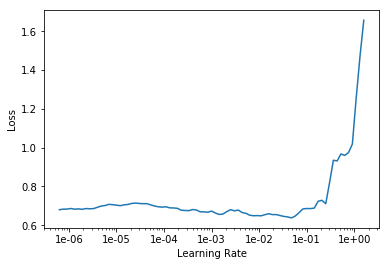

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.607761    0.582358    0.702703  (00:09)
2      0.599969    0.480357    0.814672  (00:09)
3      0.650375    0.529384    0.779923  (00:07)
4      0.606734    0.496298    0.814672  (00:08)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:10
epoch  train_loss  valid_loss  accuracy
1      0.585514    0.453283    0.806950  (00:23)
2      0.550088    0.485131    0.787645  (00:24)
3      0.485201    0.398629    0.830116  (00:23)
4      0.518240    0.379767    0.857143  (00:18)
5      0.517729    0.455988    0.814672  (00:18)
6      0.408714    0.321293    0.891892  (00:24)
7      0.404100    0.358650    0.857143  (00:20)
8      0.397292    0.354608    0.864865  (00:20)
9      0.402195    0.325096    0.876448  (00:19)
10     0.361291    0.331794    0.880309  (00:22)
11     0.342111    0.315302    0.872587  (00:21)
12     0.371400    0.278451    0.903475  (00:19)
13     0.303576    0.286961    0.891892  (00:22)
14     0.259786    0.276943    0.872587  (00:22)
15     0.308021    0.289435    0.899614  (00:19)
16     0.287473    0.294926    0.880309  (00:23)
17     0.329296    0.284213    0.888031  (00:18)
18     0.306363    0.280088    0.876448  (00:20)
19     0.260128    0.292541    0.868726  (00:23)
20     0.28

In [11]:
learn.validate()

[0.28382805, tensor(0.8764)]

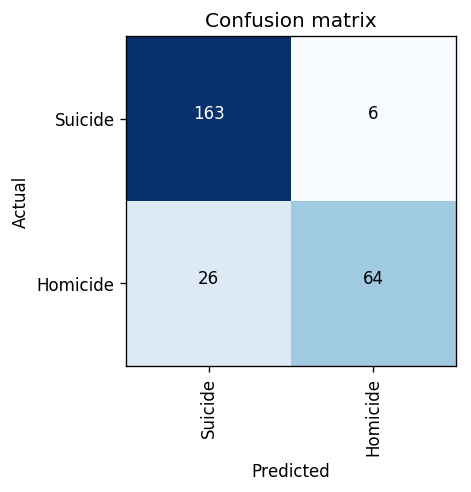

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

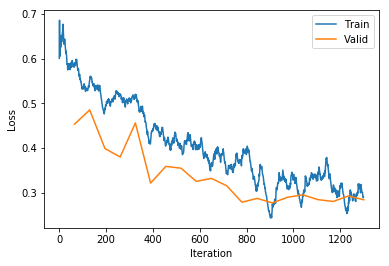

In [13]:
learn.recorder.plot_losses()

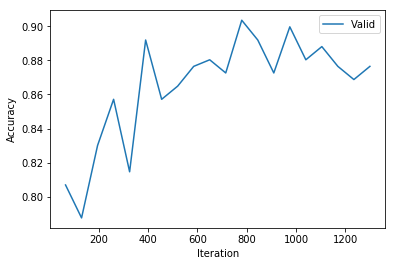

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


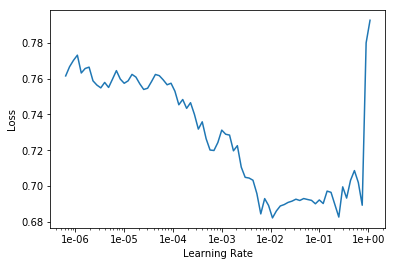

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.676342    0.578213    0.749035  (00:09)
2      0.676870    0.566754    0.772201  (00:08)
3      0.623666    0.550440    0.791506  (00:08)
4      0.600687    0.526262    0.783784  (00:08)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:05
epoch  train_loss  valid_loss  accuracy
1      0.601843    0.494797    0.795367  (00:20)
2      0.589971    0.400269    0.864865  (00:20)
3      0.561294    0.423840    0.861004  (00:20)
4      0.472610    0.395566    0.880309  (00:23)
5      0.483527    0.558174    0.733591  (00:21)
6      0.469496    0.380310    0.868726  (00:19)
7      0.468393    0.344839    0.876448  (00:18)
8      0.413138    0.318843    0.876448  (00:22)
9      0.352606    0.318936    0.884170  (00:24)
10     0.388405    0.299081    0.895753  (00:18)
11     0.376947    0.444307    0.830116  (00:20)
12     0.348924    0.306510    0.884170  (00:20)
13     0.337464    0.301136    0.895753  (00:20)
14     0.310314    0.357852    0.864865  (00:23)
15     0.328948    0.304645    0.876448  (00:20)
16     0.260216    0.315083    0.876448  (00:24)
17     0.304400    0.289902    0.888031  (00:19)
18     0.300337    0.391107    0.880309  (00:22)
19     0.341699    0.308274    0.884170  (00:18)
20     0.26

In [20]:
learn.validate()

[0.23482697, tensor(0.9266)]

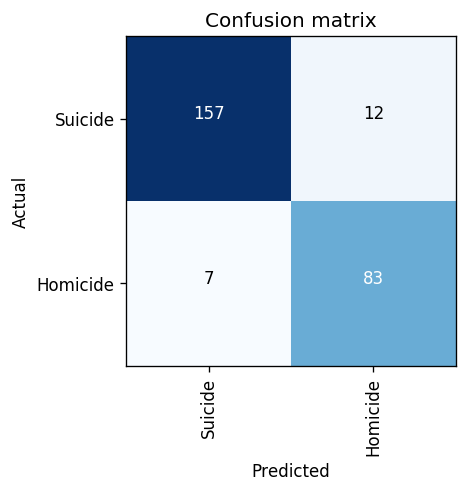

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

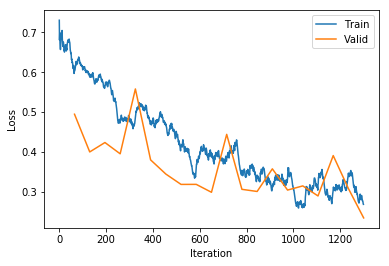

In [22]:
learn.recorder.plot_losses()

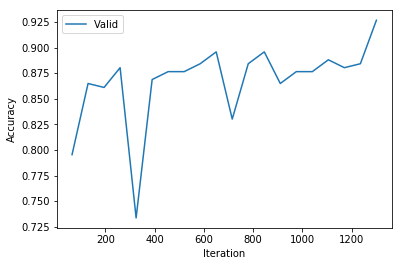

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


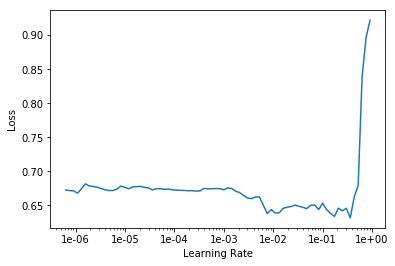

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.611552    0.548215    0.729730  (00:08)
2      0.589204    0.583940    0.694981  (00:08)
3      0.577646    0.539489    0.772201  (00:09)
4      0.572342    0.532271    0.764479  (00:08)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:23
epoch  train_loss  valid_loss  accuracy
1      0.541069    0.421228    0.861004  (00:23)
2      0.513269    0.453731    0.822394  (00:22)
3      0.484837    0.406824    0.868726  (00:22)
4      0.473529    0.488284    0.803089  (00:21)
5      0.441392    0.362938    0.837838  (00:21)
6      0.436581    0.370395    0.876448  (00:19)
7      0.386468    0.376486    0.888031  (00:24)
8      0.381830    0.329319    0.899614  (00:21)
9      0.368990    0.321083    0.888031  (00:21)
10     0.325810    0.339269    0.880309  (00:24)
11     0.333285    0.291725    0.911197  (00:21)
12     0.320425    0.295401    0.903475  (00:22)
13     0.362079    0.315236    0.891892  (00:18)
14     0.279509    0.296327    0.918919  (00:22)
15     0.289462    0.285183    0.907336  (00:22)
16     0.278117    0.271964    0.922780  (00:24)
17     0.241332    0.323626    0.880309  (00:24)
18     0.250983    0.307051    0.891892  (00:20)
19     0.322950    0.273974    0.895753  (00:18)
20     0.25

In [29]:
learn.validate()

[0.25401703, tensor(0.8996)]

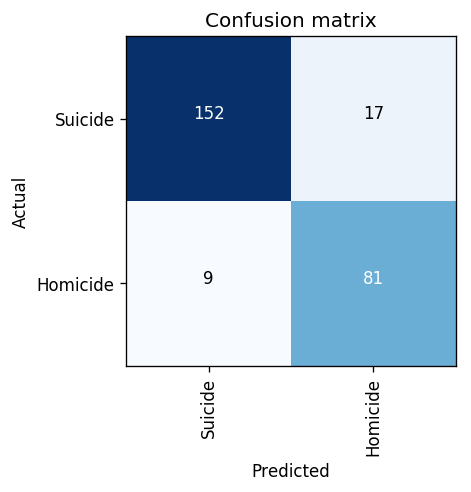

In [30]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

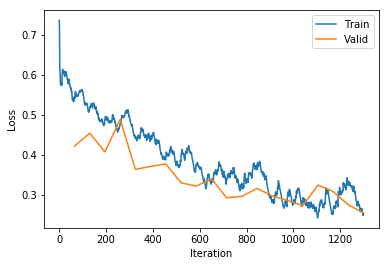

In [31]:
learn.recorder.plot_losses()

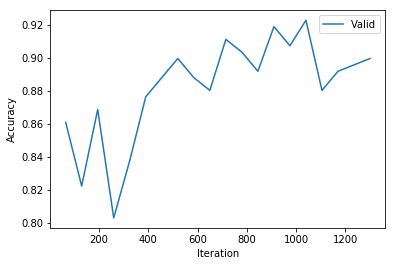

In [32]:
learn.recorder.plot_metrics()

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


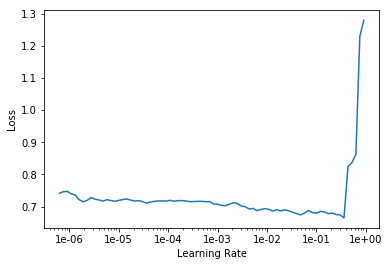

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:32
epoch  train_loss  valid_loss  accuracy
1      0.681282    0.587632    0.760618  (00:08)
2      0.608999    0.565820    0.768340  (00:09)
3      0.634791    0.537433    0.779923  (00:07)
4      0.639958    0.538734    0.787645  (00:07)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:27
epoch  train_loss  valid_loss  accuracy
1      0.563578    0.495211    0.818533  (00:24)
2      0.581281    0.485468    0.822394  (00:19)
3      0.571257    0.454532    0.849421  (00:19)
4      0.504702    0.427057    0.845560  (00:22)
5      0.510929    0.408631    0.864865  (00:18)
6      0.470242    0.411150    0.837838  (00:21)
7      0.419014    0.388217    0.884170  (00:22)
8      0.357230    0.408839    0.841699  (00:24)
9      0.348543    0.367790    0.884170  (00:25)
10     0.362083    0.369670    0.872587  (00:20)
11     0.380672    0.325787    0.891892  (00:20)
12     0.311259    0.335988    0.907336  (00:22)
13     0.316231    0.399997    0.841699  (00:22)
14     0.315285    0.331315    0.880309  (00:20)
15     0.273444    0.306629    0.907336  (00:24)
16     0.247300    0.289416    0.899614  (00:24)
17     0.285864    0.292406    0.911197  (00:21)
18     0.252551    0.271324    0.899614  (00:22)
19     0.196686    0.280088    0.899614  (00:25)
20     0.20

In [38]:
learn.validate()

[0.2580928, tensor(0.9112)]

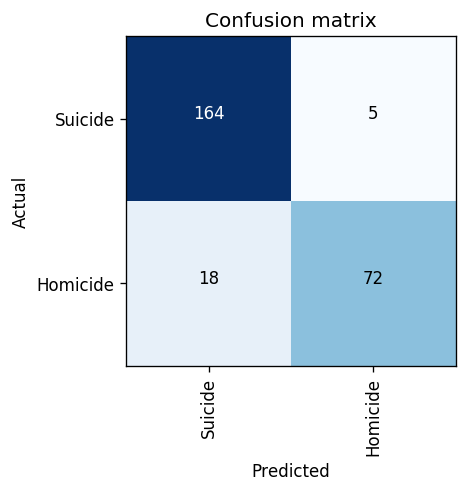

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

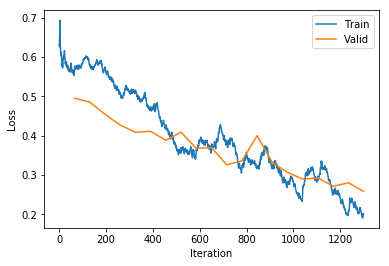

In [40]:
learn.recorder.plot_losses()

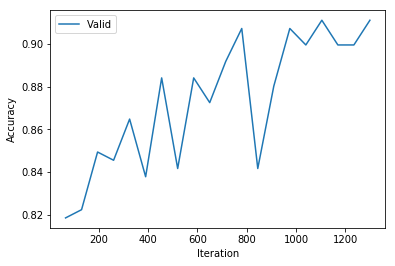

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


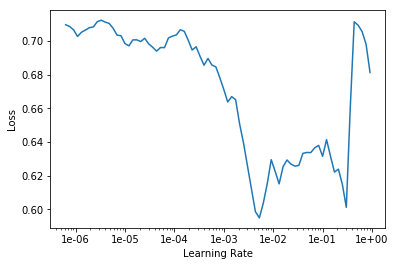

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.602391    0.607557    0.660232  (00:09)
2      0.642065    0.551431    0.783784  (00:07)
3      0.589751    0.522610    0.795367  (00:09)
4      0.565102    0.489734    0.833977  (00:09)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:14
epoch  train_loss  valid_loss  accuracy
1      0.617922    0.447848    0.861004  (00:18)
2      0.499436    0.453080    0.810811  (00:25)
3      0.505660    0.408388    0.872587  (00:20)
4      0.459574    0.383978    0.876448  (00:22)
5      0.480459    0.329633    0.903475  (00:19)
6      0.462539    0.337840    0.899614  (00:19)
7      0.410560    0.351943    0.872587  (00:20)
8      0.363641    0.431118    0.826255  (00:25)
9      0.361141    0.285426    0.888031  (00:23)
10     0.382085    0.292083    0.876448  (00:20)
11     0.358809    0.311260    0.895753  (00:20)
12     0.305304    0.297567    0.880309  (00:25)
13     0.289991    0.240797    0.915058  (00:24)
14     0.305505    0.273366    0.903475  (00:21)
15     0.278165    0.246114    0.922780  (00:23)
16     0.294354    0.253925    0.891892  (00:19)
17     0.325051    0.243380    0.911197  (00:19)
18     0.277927    0.266543    0.903475  (00:23)
19     0.277613    0.227825    0.899614  (00:19)
20     0.28

In [47]:
learn.validate()

[0.27431133, tensor(0.9035)]

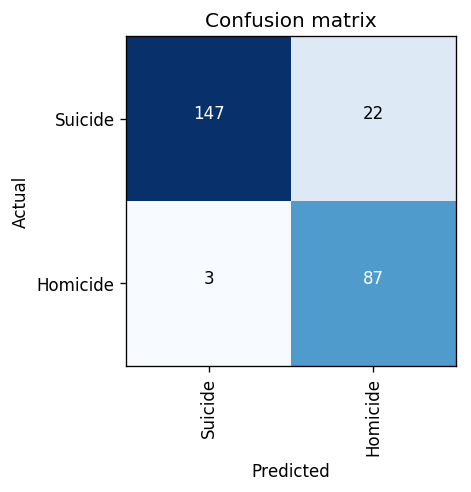

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

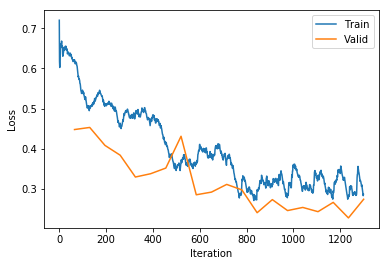

In [49]:
learn.recorder.plot_losses()

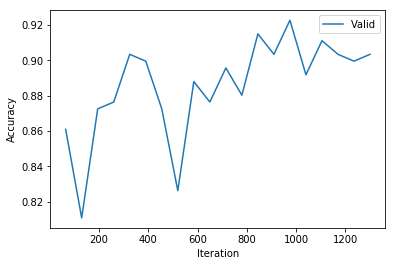

In [50]:
learn.recorder.plot_metrics()

In [51]:
print(accuracy_list)

[0.876447856426239, 0.9266409277915955, 0.8996139168739319, 0.9111968874931335, 0.9034749269485474]


In [52]:
print(sum(accuracy_list)/len(accuracy_list))

0.9034749031066894


In [53]:
print(statistics.variance(accuracy_list))

0.00033541555238087996


In [54]:
import torch

torch.cuda.empty_cache()